## THyroid disease classification


In [1]:
#import neccesary libraries
import pandas as pd

In [225]:
df = pd.read_csv("delaney_solubility_with_descriptors.csv")

In [226]:
df.head(5)

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [227]:
# to know the shape of the data set
print(f"Thyroid disease data row is {df.shape[0]}, and our column is {df.shape[1]}")

Thyroid disease data row is 1144, and our column is 5


In [228]:
df.shape

(1144, 5)

In [229]:
df.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


In [230]:
#to check missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
Total,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0


##### observation: There is no missing values in the data set

In [231]:
df.nunique()

MolLogP               930
MolWt                 806
NumRotatableBonds      19
AromaticProportion     77
logS                  743
dtype: int64

## Data Preparation

1. seperateh the target variable from the data set

In [232]:
#using one hot encoder to convert the non-numeric columns
y = df['logS']
X = pd.get_dummies(df.drop("logS", axis=1),drop_first=True)
X.head(5)

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.5954,167.850,0.0,0.0
1,2.3765,133.405,0.0,0.0
2,2.5938,167.850,1.0,0.0
3,2.0289,133.405,1.0,0.0
4,2.9189,187.375,1.0,0.0


In [233]:
y.shape

(1144,)

### let me know if smoking is a factor for thyroid disease

In [234]:
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [235]:
#splitt data into test and training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

print(X_train.shape)
print(y_test.shape)


(915, 4)
(229,)


In [236]:
# x_train,X_test = train_test_split(X, test_size=0.2, random_state = 42)
# y_train,y_test = train_test_split(y, test_size=0.2, random_state = 42)

# print(x_train.shape)
# print(y_test.shape)

In [237]:

# Check for non-numeric columns
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Index([], dtype='object')


# Lets Build our model
### Training the model
## Lets use Linear Regression

!. we would use Linear regression model because is a binary classification problem

In [238]:
from sklearn.linear_model import LinearRegression
lr  = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

## Apply our model to make prediction


In [239]:
# we start with predicting the test data
y_lr_train_prediction = lr.predict(X_train)

y_lr_test_predictioon = lr.predict(X_test)



In [240]:
y_lr_train_prediction

array([ -4.47026156,  -5.88839323,  -4.22029229,  -0.79352323,
        -1.73062942,  -1.26187649,  -1.43969557,  -2.36087206,
        -2.77481055,  -2.23755209,  -4.15424648,  -8.49226359,
        -4.26355722,  -1.5773174 ,  -2.61749814,  -0.72935686,
        -3.18513222,  -3.71048234,  -1.57995763,  -5.11539503,
        -1.90340063,  -4.18841892,  -4.85523085,  -2.13317387,
        -3.34701685,  -3.45842365,  -3.73715663,  -3.61882675,
        -3.02530867,  -2.82178231,  -1.54861269,  -2.73630968,
        -1.79353838,  -6.49056433,  -2.19068424,  -4.10802907,
        -2.7303035 ,  -2.28598248,  -2.60739155,  -3.64519507,
        -2.65218678,  -4.35285798,   1.91721982,  -3.70871993,
        -3.50138017,  -2.71898539,  -4.77720737,  -3.38184768,
        -1.71815824,  -2.79713356,  -5.26774517,  -2.96884167,
        -2.27709013,  -2.76017539,  -2.12748391,  -2.3140745 ,
        -7.74681081,  -3.21253144,  -1.76376134,  -4.17337487,
        -2.93249251,  -0.51506669,  -3.06834756,  -0.72

In [241]:

y_lr_test_predictioon

array([-1.53917269, -6.08287944, -5.28375883, -3.27746087, -1.70320929,
       -5.63167711, -1.43239582, -2.74544339, -3.43274443, -3.79048137,
       -1.26884289, -1.54861269, -3.72258406, -3.25962057, -3.76344744,
       -2.13317387, -2.00365994, -4.80828381, -1.43582956, -2.81358533,
       -2.37870232, -1.45080608, -3.71048234, -3.06158669, -1.12854214,
       -1.11007232, -2.45566761, -5.0338893 , -3.29087978, -4.21832264,
       -2.45834377, -3.09200621, -3.89726792, -1.85208473, -2.17761301,
       -6.01542152, -1.06493784, -2.35071265, -1.72034021, -1.45695216,
       -1.85208473, -6.66998091, -1.23899725, -1.46015868, -1.65115215,
       -3.79048137, -4.73551134, -1.09859266, -0.69404611, -1.91048017,
       -3.16121056, -2.34753749, -2.01980335, -2.51436431, -7.04012802,
       -5.27488937, -4.18979204, -2.9647599 , -1.7364388 , -1.64388527,
       -4.60884756, -4.84900677, -0.18955927, -1.73839902, -1.63779456,
       -2.01616982, -1.46391856, -7.64117637, -1.34518182, -2.28

## lets compare our model reslut performance with the actual data we have

In [242]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


In [243]:
y_log_train_MSE = mean_squared_error(y_train,y_lr_train_prediction)
y_log_train_r2 = r2_score(y_train,y_lr_train_prediction)

y_log_test_MSE = mean_squared_error(y_test,y_lr_test_predictioon)
y_log_test_r2 = r2_score(y_test,y_lr_test_predictioon)

print(y_log_train_MSE, y_log_train_r2 )
print(y_log_test_MSE, y_log_test_r2 )


1.0139894491573003 0.7695127746587307
0.9990844407075307 0.7705650058569231


In [244]:
#convert it to dataframe
linear_regression_result = pd.DataFrame(("LinearRegression", y_log_train_MSE, y_log_train_r2, y_log_test_MSE, y_log_test_r2 )).transpose()
linear_regression_result

,0,1,2,3,4
0,LinearRegression,1.013989,0.769513,0.999084,0.770565


In [245]:
#change the column name

linear_regression_result.columns = ["Method", "Train MSE", "Train R2", "Test MSE", "Test R2"]

linear_regression_result

,Method,Train MSE,Train R2,Test MSE,Test R2
0,LinearRegression,1.013989,0.769513,0.999084,0.770565


## Lets use the  Raandom Forst model

1. Train model
2. Apply model
3. evaluate model

#### Train model 

In [246]:
from sklearn.ensemble import RandomForestRegressor as R

In [247]:
rf = R(max_depth=2,random_state=100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Apply the model to make predictioon

### evaluate the model

In [248]:
y_rf_test_pred = rf.predict(X_test)
y_rf_test_pred

array([-1.33950462, -6.98577329, -4.39406068, -2.62909993, -1.35145256,
       -5.44303134, -1.35145256, -4.1790564 , -2.47266096, -4.33728987,
       -1.36550305, -1.35145256, -2.68110568, -2.8547836 , -3.70848106,
       -1.48334237, -2.49354382, -4.39406068, -1.25181203, -2.66705519,
       -2.49354382, -1.35145256, -4.39406068, -3.52046149, -1.17794119,
       -1.17794119, -2.49354382, -5.44303134, -2.62909993, -4.1790564 ,
       -1.48334237, -2.68110568, -4.37313972, -1.69041032, -2.66705519,
       -7.01386075, -1.17794119, -2.47146521, -2.29709247, -1.64276102,
       -1.69041032, -7.01386075, -1.36550305, -1.30996483, -2.29709247,
       -4.33728987, -4.09424671, -1.36550305, -1.17794119, -1.38179394,
       -3.60378319, -2.66705519, -1.36550305, -1.52706648, -7.01386075,
       -5.46984259, -4.07753611, -3.70848106, -1.25253761, -1.36550305,
       -4.39406068, -4.39406068, -1.17794119, -1.33950462, -2.29709247,
       -1.48347619, -1.36550305, -7.01386075, -1.36550305, -1.39

In [249]:
y_rf_train_pred = rf.predict(X_train)
y_rf_train_pred

array([-4.39406068, -7.01386075, -4.1790564 , -1.17794119, -2.2850991 ,
       -1.33950462, -1.25181203, -2.66705519, -2.65236412, -2.31264491,
       -4.1790564 , -7.01386075, -4.06327457, -1.33950462, -2.62909993,
       -1.17794119, -2.68110568, -4.39406068, -1.48786212, -5.44303134,
       -1.36708347, -4.39406068, -5.41614062, -1.48334237, -4.33728987,
       -4.09424671, -2.68110568, -2.48465432, -2.48465432, -4.3016489 ,
       -1.35145256, -2.68110568, -2.29709247, -7.01386075, -1.51301599,
       -4.33728987, -2.65236412, -2.66705519, -1.52706648, -4.09424671,
       -2.66705519, -4.39406068, -1.36550305, -4.39406068, -3.60378319,
       -2.65236412, -4.39406068, -4.39406068, -1.35145256, -2.68110568,
       -5.44303134, -3.50229491, -2.66705519, -2.66705519, -1.36550305,
       -2.65236412, -7.01386075, -2.68110568, -1.36550305, -4.09424671,
       -4.21302627, -1.17794119, -2.68110568, -1.35145256, -4.1790564 ,
       -1.51301599, -1.36550305, -7.01386075, -6.90556761, -3.70

### We want to evaluate the model performance 

In [250]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_MSE = mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)

rf_test_MSE = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

print(rf_train_MSE, rf_train_r2 )
print(rf_test_MSE, rf_test_r2 )


1.0571858086105297 0.7596939259088811
1.052089579065437 0.758392627714304


#### convert it to a data frame

In [251]:
Random_forest_result = pd.DataFrame(("RandomForset",rf_train_MSE,rf_train_r2, rf_test_MSE, rf_test_r2)).transpose()
Random_forest_result

,0,1,2,3,4
0,RandomForset,1.057186,0.759694,1.05209,0.758393


In [252]:
# Change column name
Random_forest_result.columns =["Method", "Train MSE", "Train R2", "Test MSE", "Test R2"]
Random_forest_result

,Method,Train MSE,Train R2,Test MSE,Test R2
0,RandomForset,1.057186,0.759694,1.05209,0.758393


### MODEL COMPARISON

Random_forest_result
__ You can do for more models if you want and make more comparism

In [273]:
Linear_Random_result = pd.concat([linear_regression_result, Random_forest_result ],axis=0 ).reset_index(drop=True)
Linear_Random_result

,Method,Train MSE,Train R2,Test MSE,Test R2
0,LinearRegression,1.013989,0.769513,0.999084,0.770565
1,RandomForset,1.057186,0.759694,1.05209,0.758393


### Data vsualization of predicted value and actual value

Text(0.5, 0, 'Experimental  Logs')

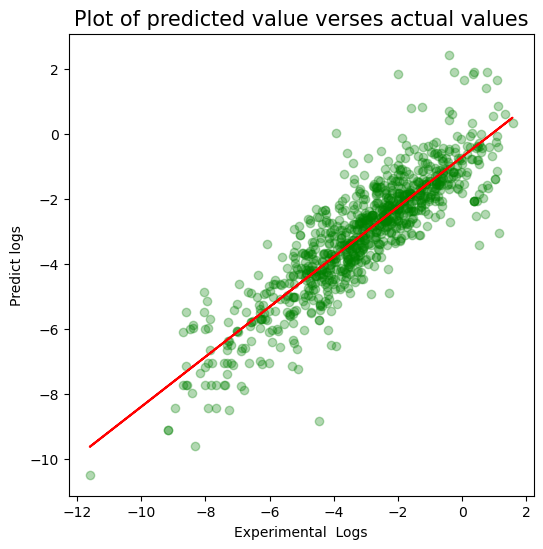

In [290]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(6,6))
plt.scatter(x=y_train, y=y_lr_train_prediction,c = "green", alpha=0.3)
plt.plot()
plt.title("Plot of predicted value verses actual values", size=15)

n = np.polyfit(y_train, y_lr_train_prediction, 1)
p = np.poly1d(n)

plt.plot(y_train, p(y_train), "red")
plt.ylabel("Predict logs")
plt.xlabel("Experimental  Logs")